## CHAPTER 4
---
# TRANSFORMING NUMERICAL VARIABLES

---
- Linear and logistic regression assume that the variables are normally distributed. 
- If they are not, we can often apply a mathematical transformation to change their distribution into Gaussian, and sometimes even unmask linear relationships between variables and their targets. 
- This means that transforming variables may improve the performance of linear machine learning models. 
- Commonly used mathematical transformations include the
    - logarithm, 
    - reciprocal, 
    - power, 
    - square and cube root transformations, as well as the 
    - Box-Cox and Yeo-Johnson transformations. 
- In this chapter, we will learn how to implement all of these operations on the variables in our dataset using the NumPy, SciPy, and Scikit-Learn libraries.

## 4.1 Transforming variables with the logarithm

- The logarithm function is commonly used to transform variables. 
- It has a strong effect on the shape of the variable distribution and can only be applied to positive variables. 
- In this section, we will learn how to perform logarithmic transformation using NumPy, and scikit-learn
- We will also create a diagnostic plot function to evaluate the effect of the transformation on the variable distribution.

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


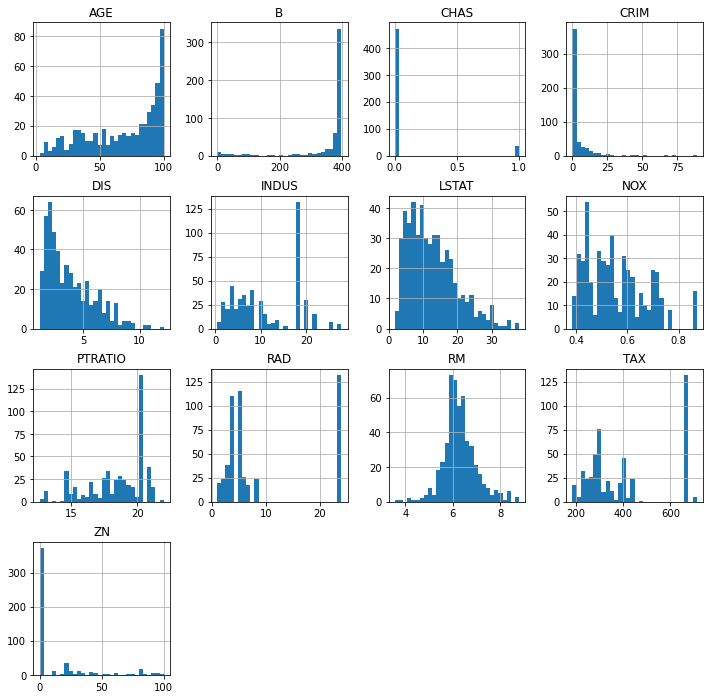

In [3]:
# plot the histogram to inspect variable distributions (not in book)
data.hist(bins=30, figsize=(12,12))
plt.show()

In [4]:
# plot histogram and Q-Q plots to have a look at the variable distribution
def diagnostic_plots(df, variable):    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

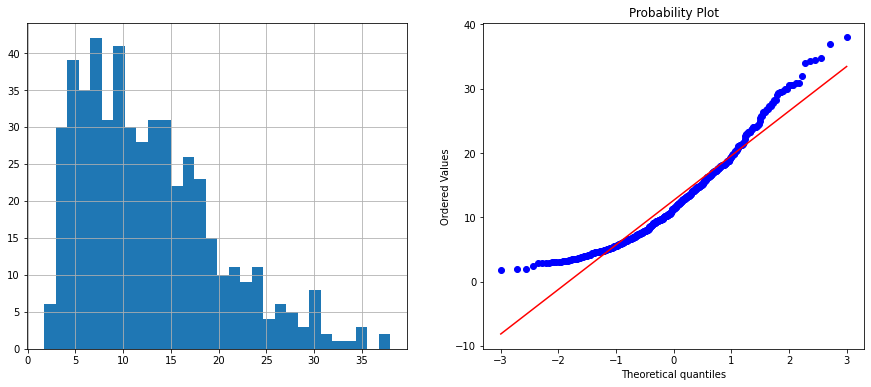

In [5]:
# check original distribution
diagnostic_plots(data, 'LSTAT')

#### Logarithmic transformation with NumPy

In [6]:
# make a copy of the dataframe where we will store the modified variables
data_tf = data.copy()

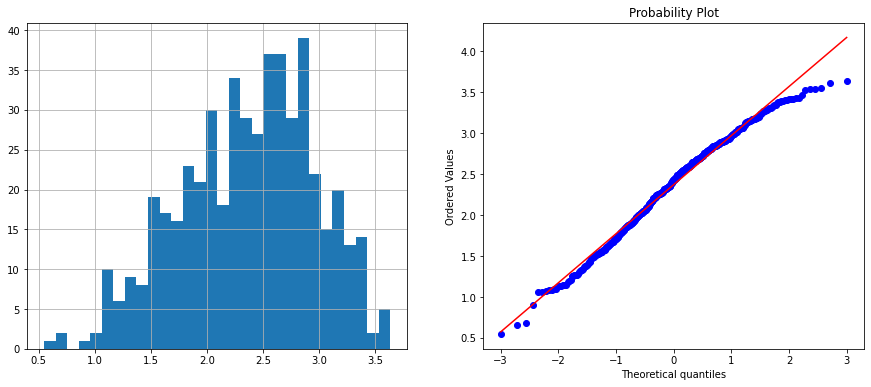

In [7]:
# apply log to a set of variables
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(
    data[['LSTAT', 'NOX', 'DIS', 'RM']])

# use diagnostic plot function to address variable transformation
diagnostic_plots(data_tf, 'LSTAT')

#### Logarithmic transformation with Scikit-learn

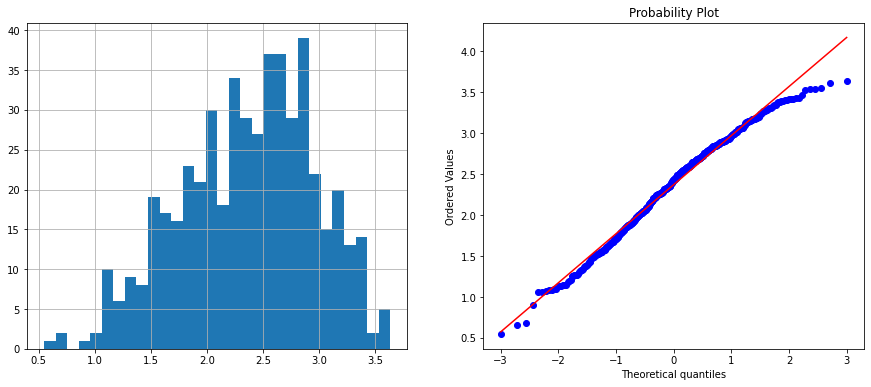

In [8]:
# start the transformer with NumPy log as argument
transformer = FunctionTransformer(np.log, validate=True)

# make a list of columns to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

# use diagnostic plot function to evaluate transformation (not in book)
diagnostic_plots(data_tf, 'LSTAT')

#### Logarithm with Scikit-learn selecting a group of variables (not in book)

In [9]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# load data set
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# list of variables to transform
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# set transformer within a pipeline
log_transformer = Pipeline(steps=[('log_transformer',
                                   FunctionTransformer(np.log, validate=True))])

# set pipeline within ColumnTransformer to select features
preprocessor = ColumnTransformer(transformers=[
    ('log_transformer', log_transformer, cols)], remainder='passthrough')

# fit to the data (the entire dataframe this time)
preprocessor.fit(data)

# transform the data
data_tf = preprocessor.transform(data)

# make a dataframe (cols=the first 4 columns)
pd.DataFrame(data_tf).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.605430,-0.619897,1.408545,1.883275,0.00632,18.0,2.31,0.0,65.2,1.0,296.0,15.3,396.90
1,2.212660,-0.757153,1.602836,1.859574,0.02731,0.0,7.07,0.0,78.9,2.0,242.0,17.8,396.90
2,1.393766,-0.757153,1.602836,1.971996,0.02729,0.0,7.07,0.0,61.1,2.0,242.0,17.8,392.83
3,1.078410,-0.780886,1.802073,1.945624,0.03237,0.0,2.18,0.0,45.8,3.0,222.0,18.7,394.63
4,1.673351,-0.780886,1.802073,1.966693,0.06905,0.0,2.18,0.0,54.2,3.0,222.0,18.7,396.90


## 4.2 Transforming variables with the reciprocal function

- The reciprocal function, defined as 1/x, is a strong transformation with a very drastic effect on the variable distribution. 
- It isn't defined for the value 0, but it can be applied to negative numbers. 
- In this section, we will implement the reciprocal transformation using NumPy and Scikit-Learn 
- We will also compare its effect with a diagnostic function.

In [11]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


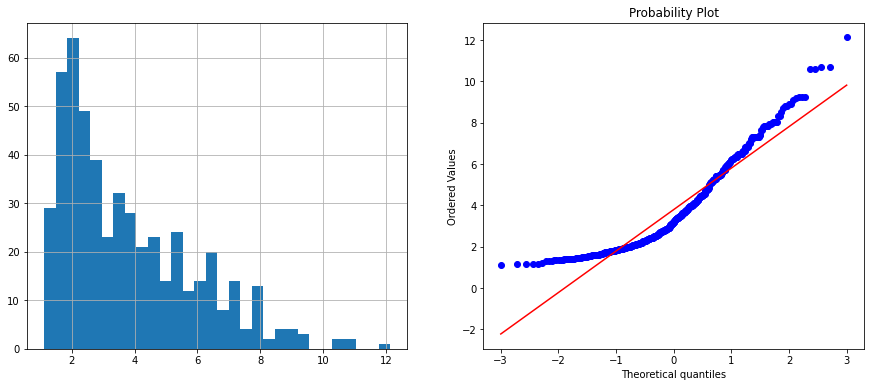

In [13]:
# plot histogram and Q-Q plots to have a look at the variable distribution
def diagnostic_plots(df, variable):    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt) 
    plt.show()
    
# check original distribution of the variable DIS
diagnostic_plots(data, 'DIS')

#### Reciprocal transformation with NumPy

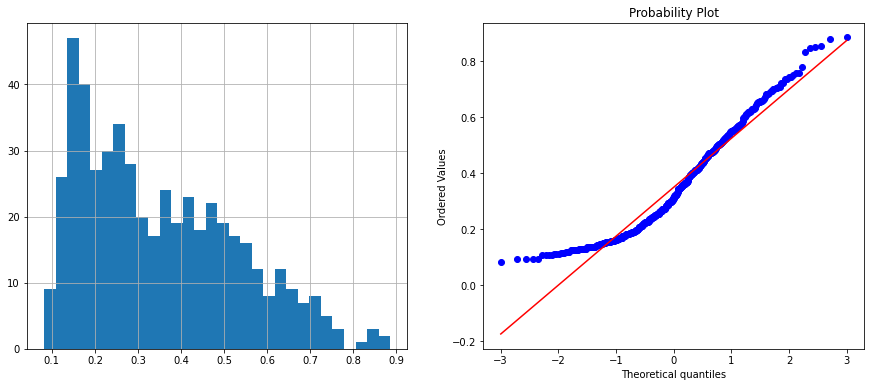

In [14]:
# make a copy of the dataframe to save changes
data_tf = data.copy()

# apply the reciprocal to a set of variables
cols = ['LSTAT', 'NOX', 'DIS', 'RM']
data_tf[cols] = np.reciprocal(data[cols])

# use diagnostic plot function to address variable transformation
diagnostic_plots(data_tf, 'DIS')

#### Reciprocal transformation with Scikit-learn

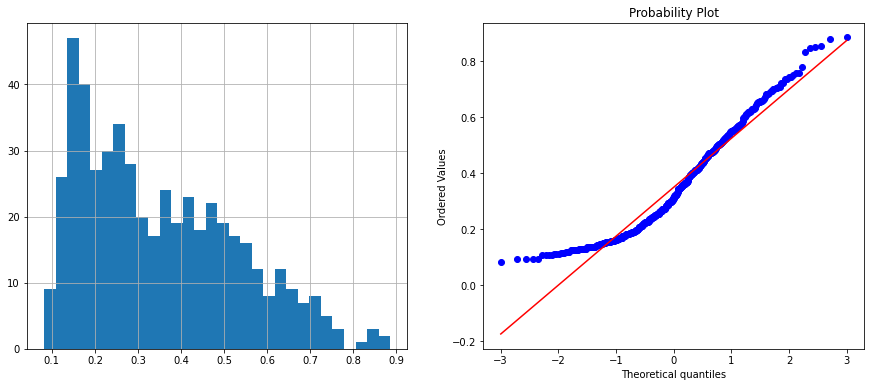

In [15]:
# start the transformer with NumPy reciprocal as argument
transformer = FunctionTransformer(np.reciprocal, validate=True)

# transform subset of dataframe
data_tf = transformer.transform(data[cols])

# capture returned NumPy array in pandas dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

# use diagnostic plot function to evaluate transformation (not in book)
diagnostic_plots(data_tf, 'DIS')

## 4.3 Using square and cube root to transform variables

- The square and cube root transformations are two specific forms of power transformations where the exponents are 1/2 and 1/3, respectively. 
- The square root transformation is not defined for negative values, so make sure you only transform those variables whose values are >=0; otherwise, you will introduce NaN or receive an error message.
- In this section, we will implement square and cube root transformations using NumPy and scikit-learn.

In [16]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source packages
from sklearn.preprocessing import FunctionTransformer

In [17]:
# display top 5 rows 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


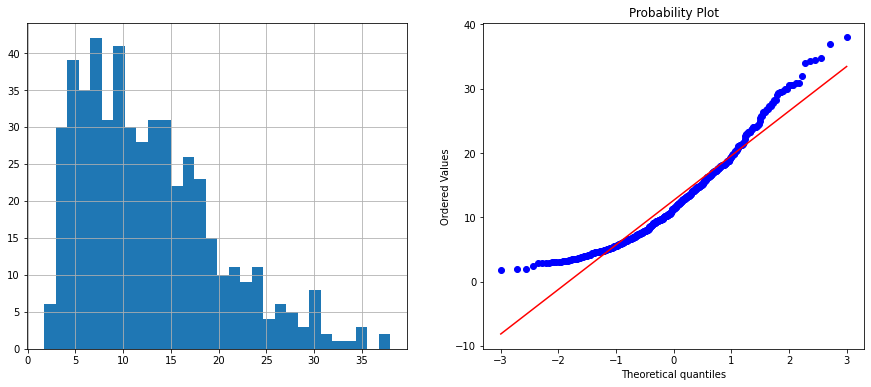

In [18]:
# check original distribution 
diagnostic_plots(data, 'LSTAT')

In [19]:
data_tf = data.copy()
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

#### Square and cube root transformation with NumPy

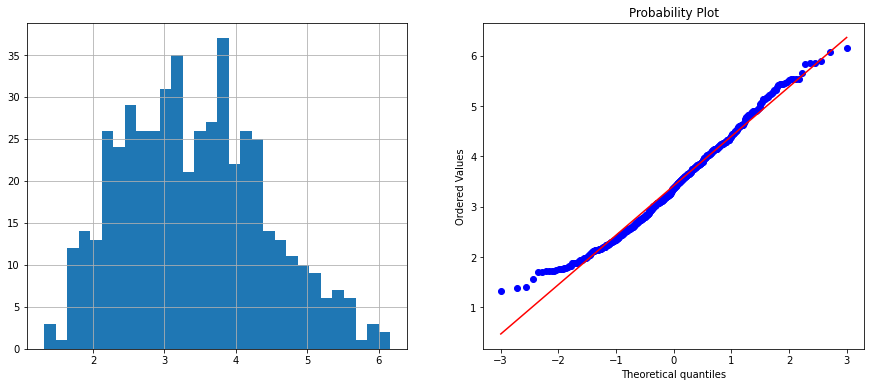

In [20]:
# apply the square root transformation to a set of variables
data_tf[cols] = np.sqrt(data[cols])

# plot to visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

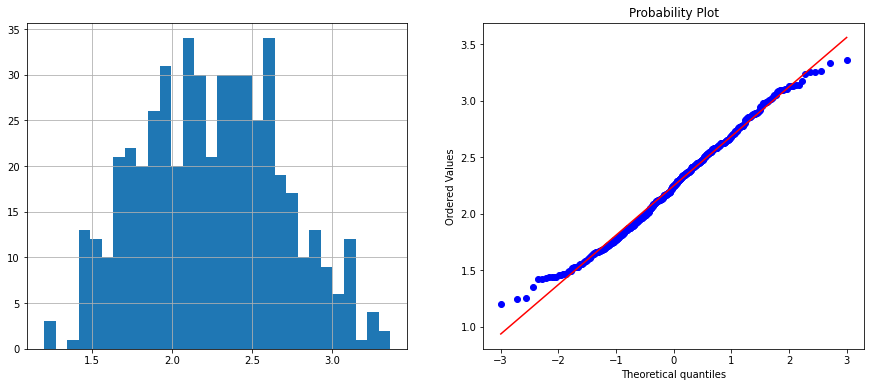

In [21]:
# apply the cube root transformation
data_tf[cols] = np.cbrt(data[cols])

# visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

#### Square or cube root transformation with Scikit-Learn

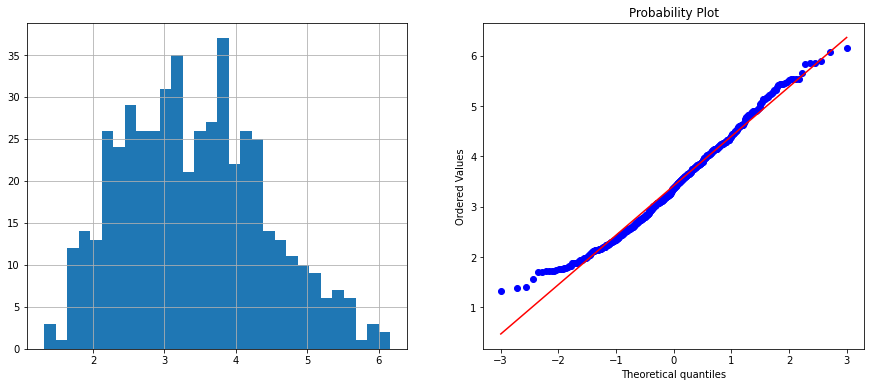

In [22]:
# start the transformer with NumPy sqrt as argument
transformer = FunctionTransformer(np.sqrt, validate=True)

# apply the transformation
data_tf = transformer.transform(data[cols])

# convert array into dataframe 
data_tf = pd.DataFrame(data_tf, columns=cols)

# visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

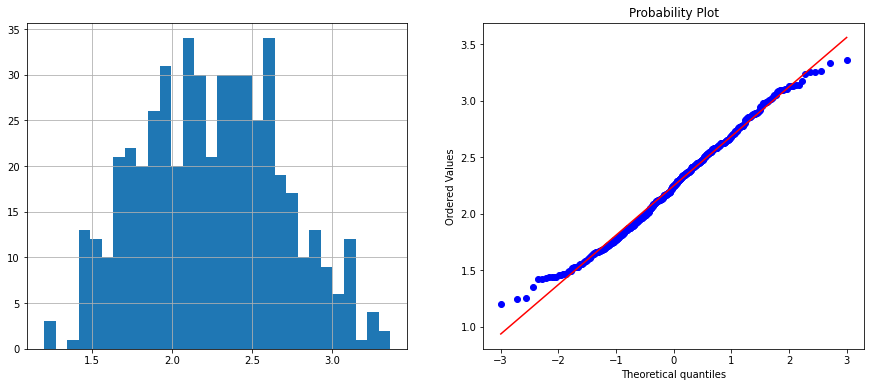

In [23]:
# start the transformer with NumPy sqrt as argument
transformer = FunctionTransformer(np.cbrt, validate=True)

# apply the transformation
data_tf = transformer.transform(data[cols])

# convert array into dataframe 
data_tf = pd.DataFrame(data_tf, columns=cols)

# visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

## 4.4 Using power transformations on numerical variables

- Exponential or power functions are mathematical transformations that follow $X_{t}$ = $X^{lambda}$, where lambda can be any exponent 
- The square and cube root transformations are special cases of power transformations where lambda is 1/2 or 1/3, respectively 
- In practice, we try different lambdas to determine which one offers the best transformation 
- In this recipe, we will carry out power transformations using NumPy and Scikit-Learn

In [24]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source package
from sklearn.preprocessing import FunctionTransformer

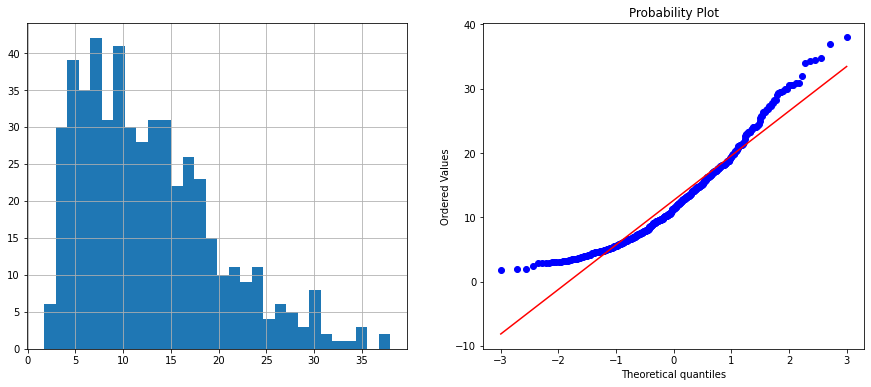

In [25]:
# check the original distribution 
diagnostic_plots(data, 'LSTAT')

In [26]:
data_tf = data.copy()
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

#### Power transformation with NumPy

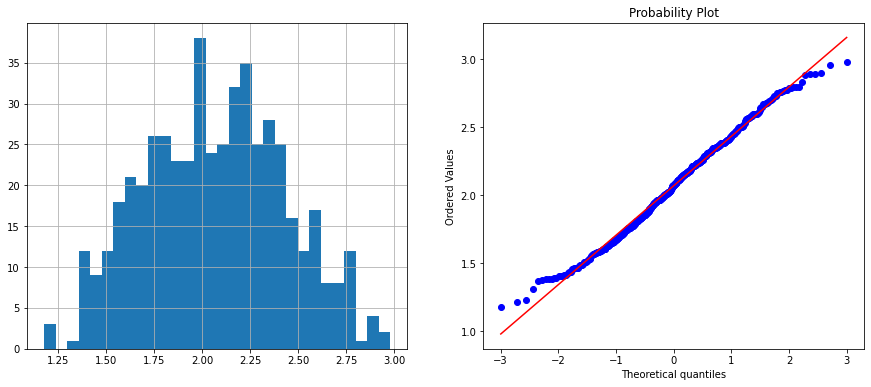

In [27]:
# apply a 0.3 exponent power transformation
data_tf[cols] = np.power(data[cols], 0.3)

# visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

#### Power transformation with Scikit-Learn

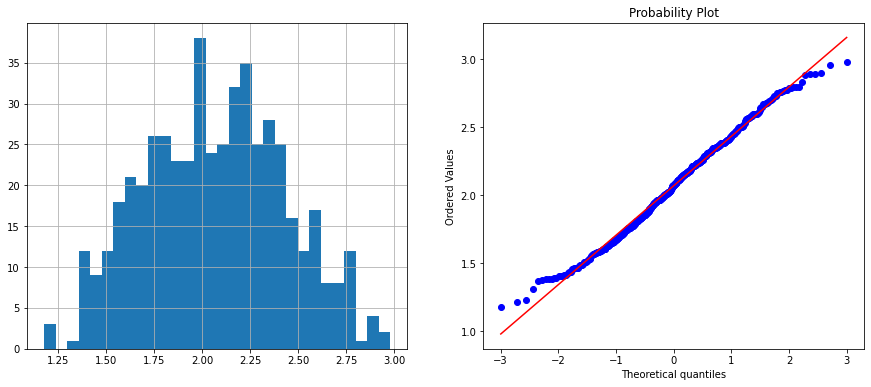

In [28]:
# initialize the transformer with a the 0.3 power transformation
transformer = FunctionTransformer(lambda x: np.power(x, 0.3), validate=True)

# apply the transformation
data_tf = transformer.transform(data[cols])

# capture returned NumPy array into a dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

# visualize the transformation
diagnostic_plots(data_tf, 'LSTAT')

## 4.5 Performing Box-Cox transformation on numerical variables

- The Box-Cox transformation belongs to the power family of functions and is defined by 
    - $(X^{\lambda}-1) / {\lambda}$ if X > 0 or 
    - log(X) if X = 0, where X is the variable and {\lambda} is the transformation parameter. 
- In the Box-Cox transformation, several values of λ are considered and the λ that returns the best transformation is selected. 
- In this section, we will perform Box-Cox transformation using SciPy and Scikit-Learn.
- The Box-Cox transformation can only be used on positive variables. If your variables have negative values, try the **Yeo-Johnson transformation**, which is described in the next section.

In [29]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source package
from sklearn.preprocessing import PowerTransformer

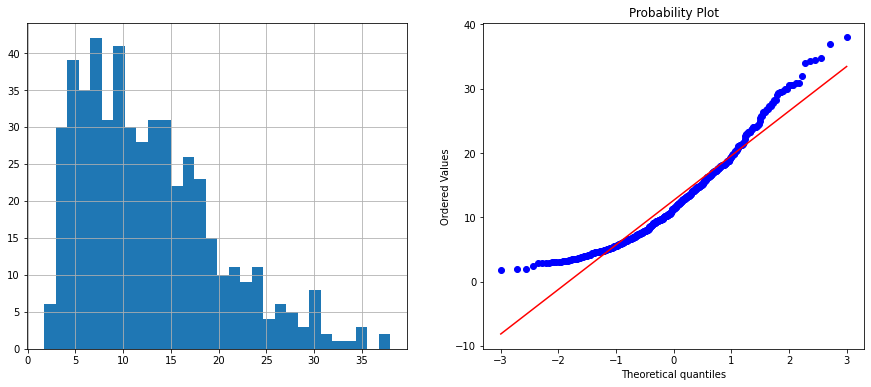

In [30]:
data_tf = data.copy()
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# check original distribution 
diagnostic_plots(data, 'LSTAT')

#### Box-Cox transformation with SciPy

Optimal λ:  0.22776736893884023


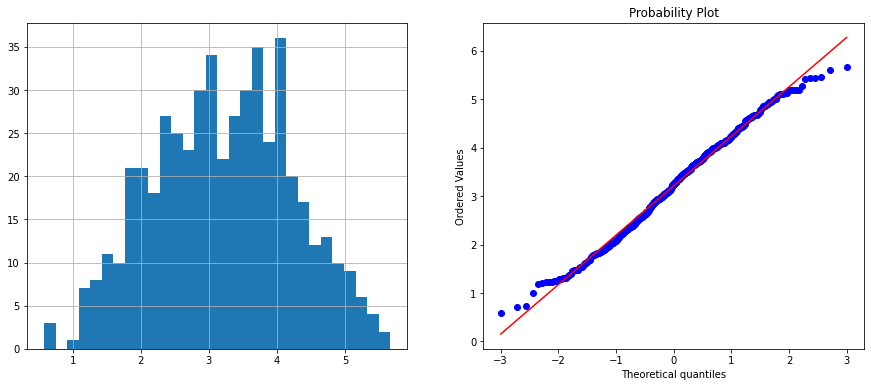

In [31]:
# apply the Box-Cox transformation to LSTAT
data_tf['LSTAT'], param = stats.boxcox(data['LSTAT']) 

# print the optimal lambda 
print('Optimal λ: ', param)

# visualize the transformation
diagnostic_plots(data_tf, 'LSTAT')

#### Box-Cox transformation with Scikit-Learn

In [32]:
# initialize the transformer
transformer = PowerTransformer(method='box-cox', standardize=False)

# fit the transformer to get the lambdas
transformer.fit(data[cols])

# see the lambdas
transformer.lambdas_

array([ 0.22776737, -0.91561209, -0.15560583,  0.44895979])

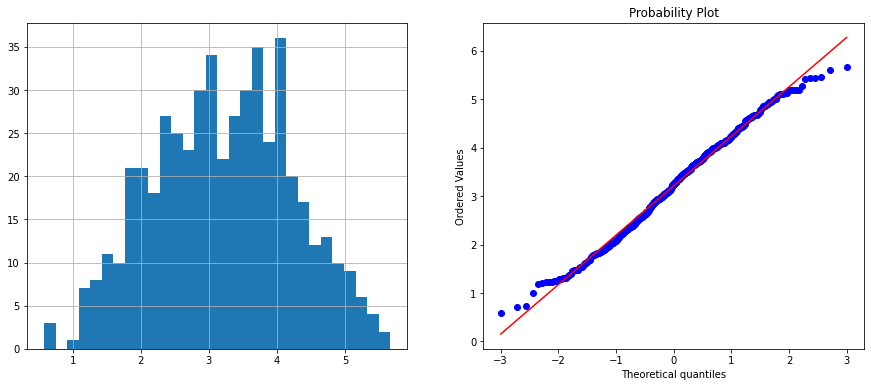

In [33]:
# apply transformer to cols
data_tf = transformer.transform(data[cols])

# transform array into dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

# visualize LSTAT transformation
diagnostic_plots(data_tf, 'LSTAT')

## 4.6 Performing Yeo-Johnson transformation on numerical variables

- The Yeo-Johnson transformation is an extension of the Box-Cox transformation and can be used on variables with zero and negative values, as well as positive values. 
- These transformations can be defined as follows:	
    - $\frac{(X+1)^{\lambda}-1)}{\lambda}$ ; if ${\lambda}$ is not 0 and X >= zero
    - ln(X + 1 ); if ${\lambda}$ is zero and X >= zero
    - $\frac{(-X+1)^{2-λ} - 1}{2-λ}$; if ${\lambda}$ is not 2 and X is negative
    - -ln(-X + 1); if ${\lambda}$ is 2 and X is negative
- In this section, we will perform the Yeo-Johnson transformation using SciPy and Scikit-Learn

In [34]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

# with open-source package
from sklearn.preprocessing import PowerTransformer

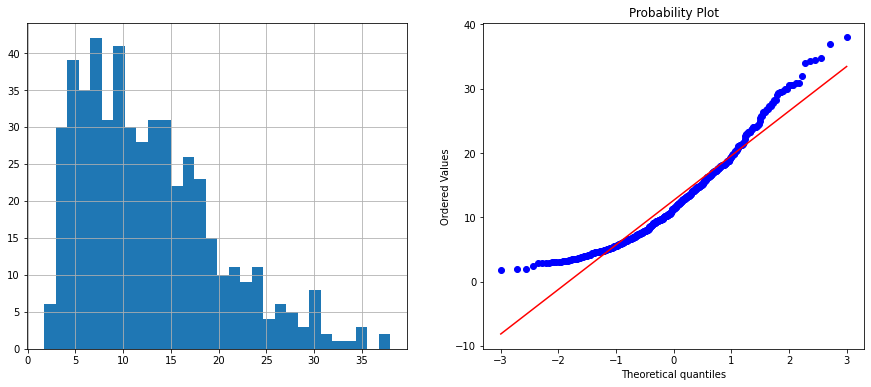

In [35]:
data_tf = data.copy()
cols = ['LSTAT', 'NOX', 'DIS', 'RM']

# check original distribution 
diagnostic_plots(data, 'LSTAT')

#### Yeo-Johnson transformation with SciPy

Optimal λ:  0.15370552301825943


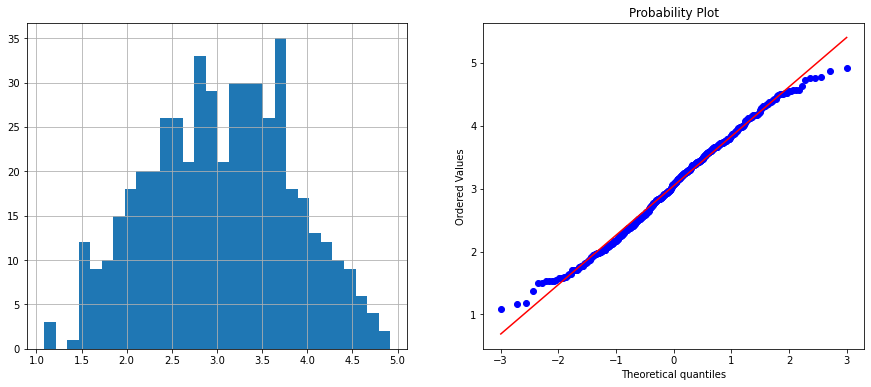

In [36]:
# apply the Yeo_johnson transformation to LSTAT
data_tf['LSTAT'], param = stats.yeojohnson(data['LSTAT']) 

# print the optimal lambda 
print('Optimal λ: ', param)

# visualize the transformation 
diagnostic_plots(data_tf, 'LSTAT')

#### Ye-Johnson transformation with Scikit-Learn

In [37]:
# initialize a yeo-johnson transformer
transformer = PowerTransformer(method='yeo-johnson', standardize=False)

# fit transformer to cols
transformer.fit(data[cols])

# see the transformer's stored lambdas
transformer.lambdas_

array([ 0.15370552, -3.97371104, -0.44887192,  0.33298652])

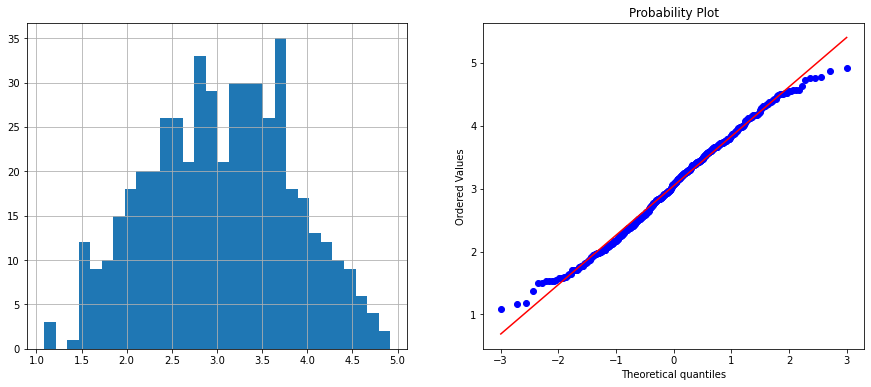

In [38]:
# transform indicated variables
data_tf = transformer.transform(data[cols])

# capture the array into dataframe
data_tf = pd.DataFrame(data_tf, columns=cols)

# plot the distribution
diagnostic_plots(data_tf, 'LSTAT')